In [9]:
romania_only=True

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_excel('report.xlsx')
tag = pd.read_excel('problem_description.xlsx', index_col='Name')

In [12]:
df1 = df[['Friendly_Name','Problem_ID', 'Message']]

In [13]:
df1 = df1.fillna(value='')
if romania_only:
    df1 = df1[df1['Friendly_Name'].str.contains("RO-")]
problems_index = (df1['Problem_ID'].value_counts()).to_frame()
problems_index.rename(columns = {'Problem_ID' : 'NO_Problems'}, inplace=True)
problems = problems_index.reset_index()
problems.rename(columns = {'index' : 'Problem_ID'}, inplace=True)

<AxesSubplot:ylabel='NO_Problems'>

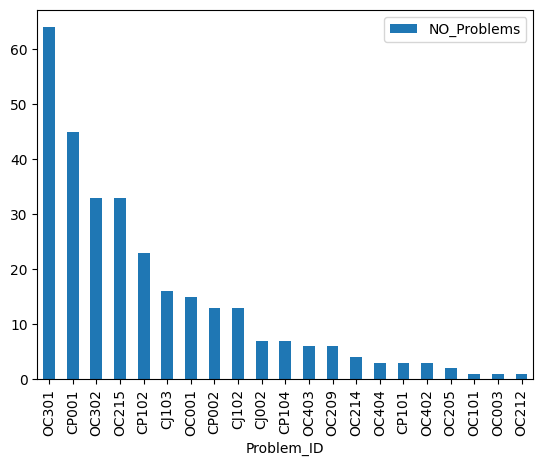

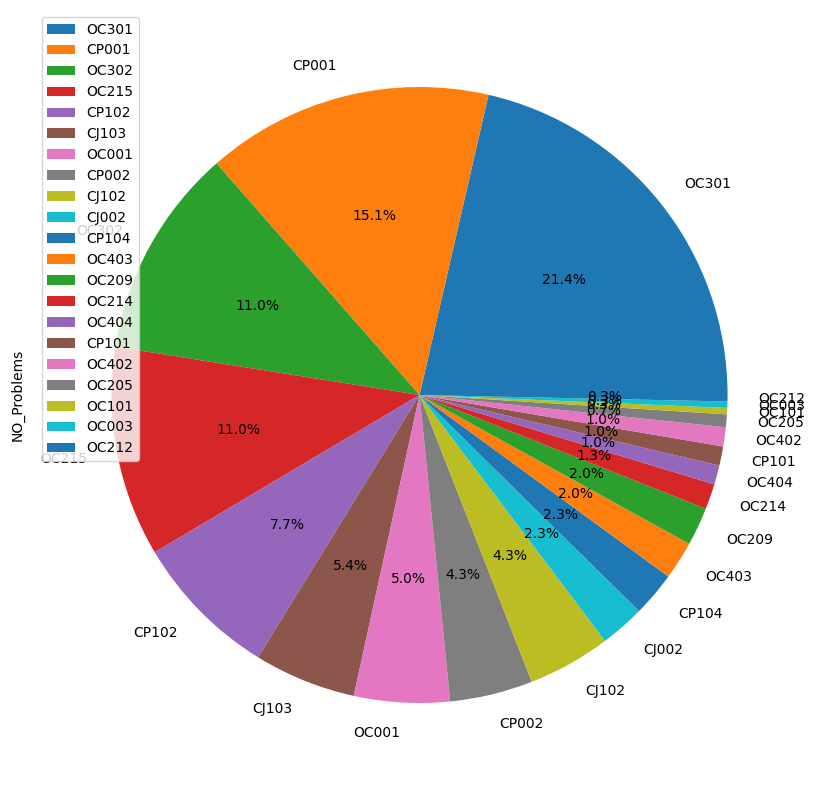

In [14]:
problems.plot.bar(x='Problem_ID', y='NO_Problems')
problems_index.plot.pie(y='NO_Problems', figsize=(10, 10), autopct='%1.1f%%')


In [15]:
tag
list_prob = (problems['Problem_ID'].to_numpy()).tolist()
tag = tag.loc[list_prob]
no_problems = problems['NO_Problems']
problems_index['Explanation'] = tag['Explanation']
problems_index

,NO_Problems,Explanation
OC301,64,No Raritan KVM Specified for the SUT
CP001,45,No monitoring evidence found in the past 12h f...
OC302,33,No PDU specified for the SUT
OC215,33,QDF entry '' must have exactly 4 characters
CP102,23,Linux monitoring software for SUT outdated
CJ103,16,The system used in VPUX/FW instance doesn't ha...
OC001,15,Rack or Shelf location is not valid
CP002,13,No monitoring evidence found in the past 12h f...
CJ102,13,"Instance has status 'Online', but it should b..."
CJ002,7,Duplicate Friendly Name
